<a href="https://colab.research.google.com/github/Avishek-Majumder/Morphological-operation-for-single-image-and-dataset/blob/main/Morphological_operation_for_a_single_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

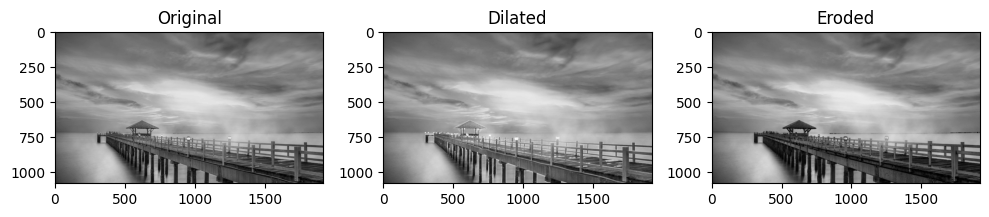

Processed images saved in processed_images.zip.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os

# Load the image
image_path = "/content/drive/MyDrive/walp/105000000000259868_1920x1080.jpg"
image = cv2.imread(image_path, 0)  # Read the image as grayscale

# Perform morphological operation
kernel = np.ones((5, 5), np.uint8)  # Define the kernel for morphological operation
# Perform dilation
dilated_image = cv2.dilate(image, kernel, iterations=1)
# Perform erosion
eroded_image = cv2.erode(image, kernel, iterations=1)

# Create a directory to store the processed images
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

# Save the processed images
cv2.imwrite(os.path.join(output_dir, "original.jpg"), image)
cv2.imwrite(os.path.join(output_dir, "dilated.jpg"), dilated_image)
cv2.imwrite(os.path.join(output_dir, "eroded.jpg"), eroded_image)

# Create a zip file to store the images
zip_file = "processed_images.zip"
with zipfile.ZipFile(zip_file, "w") as zf:
    # Add the images to the zip file
    zf.write(os.path.join(output_dir, "original.jpg"), "original.jpg")
    zf.write(os.path.join(output_dir, "dilated.jpg"), "dilated.jpg")
    zf.write(os.path.join(output_dir, "eroded.jpg"), "eroded.jpg")

# Remove the individual image files
os.remove(os.path.join(output_dir, "original.jpg"))
os.remove(os.path.join(output_dir, "dilated.jpg"))
os.remove(os.path.join(output_dir, "eroded.jpg"))
os.rmdir(output_dir)

# Display the original and processed images
plt.figure(figsize=(10, 5))
plt.subplot(131), plt.imshow(image, cmap="gray"), plt.title("Original")
plt.subplot(132), plt.imshow(dilated_image, cmap="gray"), plt.title("Dilated")
plt.subplot(133), plt.imshow(eroded_image, cmap="gray"), plt.title("Eroded")
plt.tight_layout()
plt.show()

# Provide the zip file for download
print(f"Processed images saved in {zip_file}.")

# Download the zip file
from google.colab import files
files.download(zip_file)
